#  Video Game Sales Analysis
## About
 - This project analyzes global video game sales trends using charts. Key insights include platform success timelines, genre popularity, and regional market differences.
## Business Problems
 - A game company wants to expand into new markets and improve revenue from existing titles. This analysis identifies top-performing genres, platforms, and regional trends to guide product and marketing strategy.

In [2]:
## Importing packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="whitegrid")
import plotly.express as px

import warnings
warnings.filterwarnings('ignore')

In [3]:
df = pd.read_csv("vgsales.csv")
df0 = df.copy()

### Data Exploration

In [5]:
print(df0.info())
print()
print(df0.isna().sum())
print()
print('Number of Duplicates:', df0.duplicated().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16598 entries, 0 to 16597
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Rank          16598 non-null  int64  
 1   Name          16598 non-null  object 
 2   Platform      16598 non-null  object 
 3   Year          16327 non-null  float64
 4   Genre         16598 non-null  object 
 5   Publisher     16540 non-null  object 
 6   NA_Sales      16598 non-null  float64
 7   EU_Sales      16598 non-null  float64
 8   JP_Sales      16598 non-null  float64
 9   Other_Sales   16598 non-null  float64
 10  Global_Sales  16598 non-null  float64
dtypes: float64(6), int64(1), object(4)
memory usage: 1.4+ MB
None

Rank              0
Name              0
Platform          0
Year            271
Genre             0
Publisher        58
NA_Sales          0
EU_Sales          0
JP_Sales          0
Other_Sales       0
Global_Sales      0
dtype: int64

Number of Duplicates: 0


- This dataset contains `16598 Rows` and `11 columns`.
- It contains total of 329 null values. `271 in Year` and `58 in Publisher`
- We have to convert Year columns from float to int

In [7]:
## Droping null values
df0.dropna(inplace=True)
print(df0.isna().sum())

Rank            0
Name            0
Platform        0
Year            0
Genre           0
Publisher       0
NA_Sales        0
EU_Sales        0
JP_Sales        0
Other_Sales     0
Global_Sales    0
dtype: int64


Droped the null values by rows

In [9]:
df0.describe()

,Rank,Year,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
count,16291.000000,16291.000000,16291.000000,16291.000000,16291.000000,16291.000000,16291.000000
mean,8290.190228,2006.405561,0.265647,0.147731,0.078833,0.048426,0.540910
std,4792.654450,5.832412,0.822432,0.509303,0.311879,0.190083,1.567345
min,1.000000,1980.000000,0.000000,0.000000,0.000000,0.000000,0.010000
25%,4132.500000,2003.000000,0.000000,0.000000,0.000000,0.000000,0.060000
50%,8292.000000,2007.000000,0.080000,0.020000,0.000000,0.010000,0.170000
75%,12439.500000,2010.000000,0.240000,0.110000,0.040000,0.040000,0.480000
max,16600.000000,2020.000000,41.490000,29.020000,10.220000,10.570000,82.740000


In [10]:
##Desribing the Categorical variables
df0.describe(exclude='number')

,Name,Platform,Genre,Publisher
count,16291,16291,16291,16291
unique,11325,31,12,576
top,Need for Speed: Most Wanted,DS,Action,Electronic Arts
freq,12,2131,3251,1339


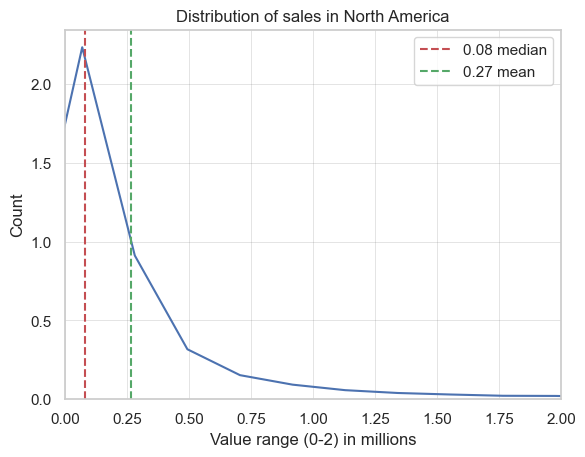

In [11]:
## Distribution of Game sales in North America
sns.kdeplot(df0['NA_Sales'])
plt.title('Distribution of sales in North America')
plt.xlabel('Value range (0-2) in millions')
plt.ylabel('Count')
median,mean = str(round(df0['NA_Sales'].median(),2)), str(round(df0['NA_Sales'].mean(),2))
plt.axvline(df0['NA_Sales'].median(),ls='--',c='r',label=median+ ' median')
plt.axvline(df0['NA_Sales'].mean(),ls='--',c='g',label=mean+ ' mean')
plt.xlim(0,2)
plt.grid(color='gray',lw=0.5,alpha=0.3)
plt.legend();

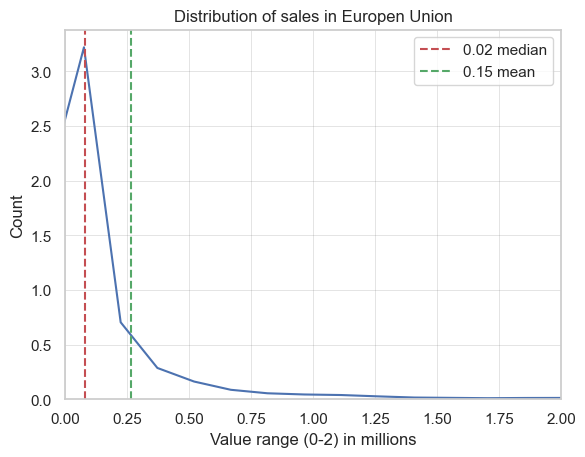

In [12]:
## Distribution of Game sales in Europen Union Sales
sns.kdeplot(df0['EU_Sales'],)
plt.title('Distribution of sales in Europen Union')
plt.xlabel('Value range (0-2) in millions')
plt.ylabel('Count')
median,mean = str(round(df0['EU_Sales'].median(),2)), str(round(df0['EU_Sales'].mean(),2))
plt.axvline(df0['NA_Sales'].median(),ls='--',c='r',label=median+ ' median')
plt.axvline(df0['NA_Sales'].mean(),ls='--',c='g',label=mean+ ' mean')
plt.xlim(0,2)
plt.grid(color='gray',lw=0.5,alpha=0.3)
plt.legend();

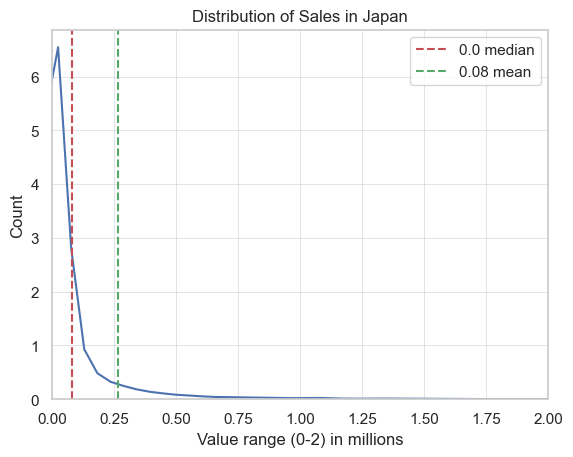

In [13]:
## Distribution of Game sales in Japan
sns.kdeplot(df0['JP_Sales'])
plt.title('Distribution of Sales in Japan')
plt.xlabel('Value range (0-2) in millions')
plt.ylabel('Count')
median,mean = str(round(df0['JP_Sales'].median(),2)), str(round(df0['JP_Sales'].mean(),2))
plt.axvline(df0['NA_Sales'].median(),ls='--',c='r',label=median+ ' median')
plt.axvline(df0['NA_Sales'].mean(),ls='--',c='g',label=mean+ ' mean')
plt.xlim(0,2)
plt.grid(color='gray',lw=0.5,alpha=0.3)
plt.legend();

In [14]:
## Game Sales Aggrigation
df0[['Global_Sales','NA_Sales','EU_Sales','JP_Sales']].agg(['sum','mean','median','std'])

,Global_Sales,NA_Sales,EU_Sales,JP_Sales
sum,8811.970000,4327.650000,2406.690000,1284.270000
mean,0.540910,0.265647,0.147731,0.078833
median,0.170000,0.080000,0.020000,0.000000
std,1.567345,0.822432,0.509303,0.311879


Most of the sales in different region are from 0 to 0.50 with global sales averge of 0.08 millions over all years

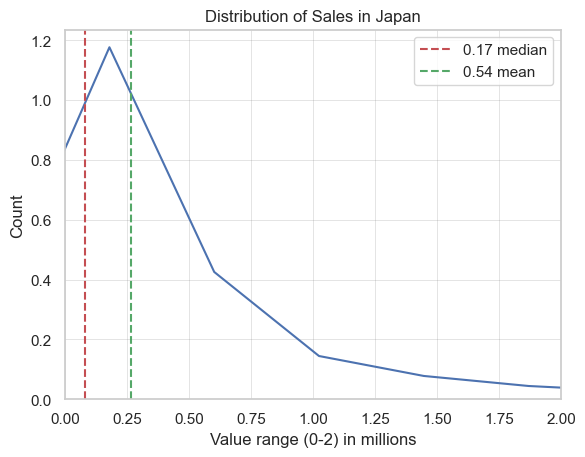

In [16]:
## Distribution of Game Global sales
sns.kdeplot(df0['Global_Sales'])
plt.title('Distribution of Sales in Japan')
plt.xlabel('Value range (0-2) in millions')
plt.ylabel('Count')
median,mean = str(round(df0['Global_Sales'].median(),2)), str(round(df0['Global_Sales'].mean(),2))
plt.axvline(df0['NA_Sales'].median(),ls='--',c='r',label=median+ ' median')
plt.axvline(df0['NA_Sales'].mean(),ls='--',c='g',label=mean+ ' mean')
plt.xlim(0,2)
plt.grid(color='gray',lw=0.5,alpha=0.3)
plt.legend();

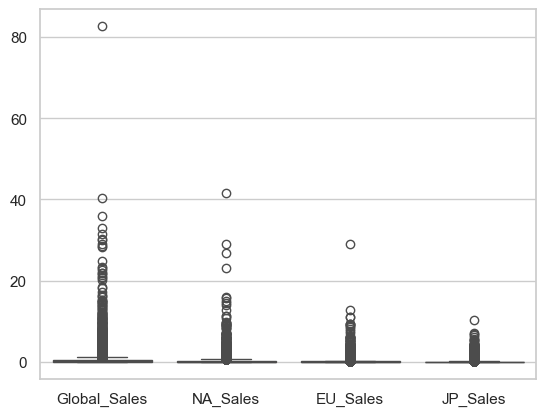

In [17]:
## Checking for outliers
sns.boxplot(data=df0[['Global_Sales', 'NA_Sales', 'EU_Sales', 'JP_Sales']]);

 - Some games in the dataset are natural outliers due to massive global popularity. Instead of removing them, I retained these values to preserve important market insights.
 - Outliers were retained to reflect real world variance in game sales. No ML model is applied, so robustness to outliers wasn’t critical.

In [19]:
## Checking for miss leading name duplication
print('distinct Platform: ', df0['Platform'].sort_values().unique())
print()
print('Year unique values: ',df0['Year'].sort_values().unique())
print()
print('Gener unique values: ',df0['Genre'].sort_values().unique())
print()
print('Publisher unique values: ',df0['Publisher'].sort_values().nunique())

distinct Platform:  ['2600' '3DO' '3DS' 'DC' 'DS' 'GB' 'GBA' 'GC' 'GEN' 'GG' 'N64' 'NES' 'NG'
 'PC' 'PCFX' 'PS' 'PS2' 'PS3' 'PS4' 'PSP' 'PSV' 'SAT' 'SCD' 'SNES' 'TG16'
 'WS' 'Wii' 'WiiU' 'X360' 'XB' 'XOne']

Year unique values:  [1980. 1981. 1982. 1983. 1984. 1985. 1986. 1987. 1988. 1989. 1990. 1991.
 1992. 1993. 1994. 1995. 1996. 1997. 1998. 1999. 2000. 2001. 2002. 2003.
 2004. 2005. 2006. 2007. 2008. 2009. 2010. 2011. 2012. 2013. 2014. 2015.
 2016. 2017. 2020.]

Gener unique values:  ['Action' 'Adventure' 'Fighting' 'Misc' 'Platform' 'Puzzle' 'Racing'
 'Role-Playing' 'Shooter' 'Simulation' 'Sports' 'Strategy']

Publisher unique values:  576


In [20]:
# Remove missing years (if any)
df_year = df0.dropna(subset=['Year'])

# Group by Year and sum Global_Sales
yearly_sales = df_year.groupby('Year')[['Global_Sales','NA_Sales','EU_Sales','JP_Sales']].sum().reset_index()

# Sort by year (ascending)
yearly_sales = yearly_sales.sort_values(by='Year')

In [21]:
## Checking for misspelled name
df0[df0['Publisher'].str.lower().str.startswith('sony')]['Publisher'].unique()

array(['Sony Computer Entertainment',
       'Sony Computer Entertainment Europe', 'Sony Online Entertainment',
       'Sony Computer Entertainment America', 'Sony Music Entertainment'],
      dtype=object)

In [22]:
## Renaming the strings
df0.loc[df0['Publisher'].str.lower().str.startswith('sony'),'Publisher'] = 'Sony Computer Entertainment'

In [23]:
## Cross checking the name
df0[df0['Publisher'].str.lower().str.startswith('sony')]['Publisher'].unique()

array(['Sony Computer Entertainment'], dtype=object)

`Renamed` the 'Sony Computer Entertainment','Sony Computer Entertainment Europe', 'Sony Online Entertainment','Sony Computer Entertainment America', 'Sony Music Entertainment' to `Sony Computer Entertainment`

## Exploratory Data Analysis

## Global Sales Trend by Region
This line chart shows how global, `North America`, `European Union`, and `Japan` sales evolved over the years.


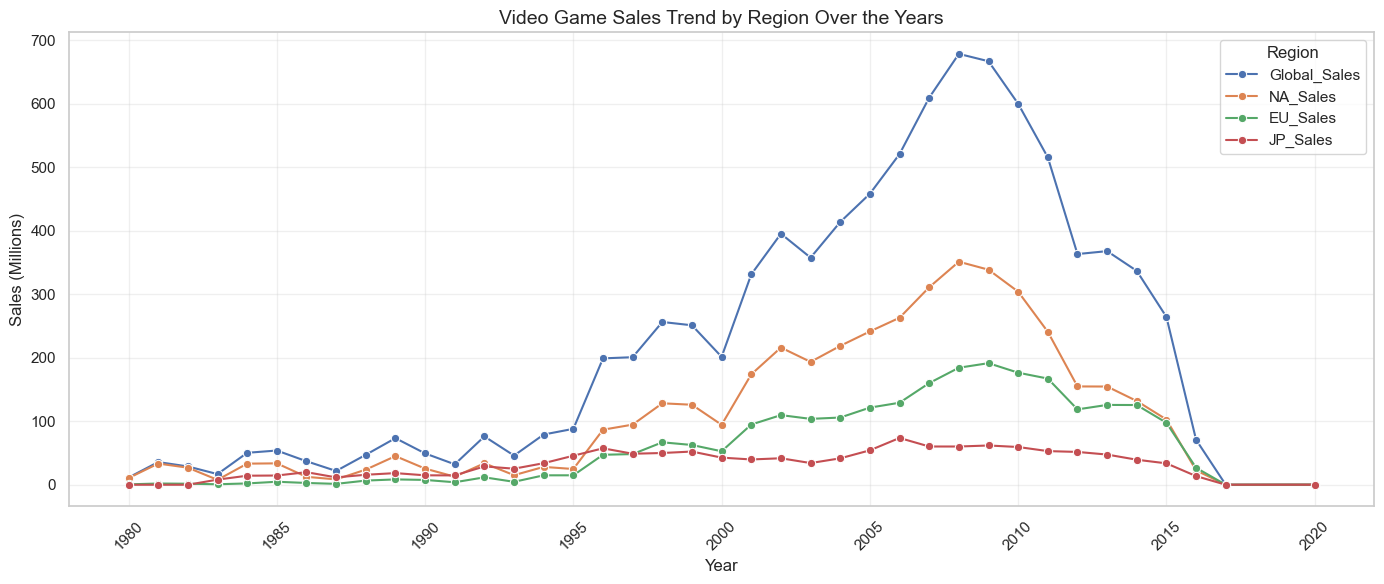

In [27]:
## Combaining the columns
melted = yearly_sales.melt(id_vars='Year', 
                           value_vars=['Global_Sales', 'NA_Sales', 'EU_Sales', 'JP_Sales'],
                           var_name='Region',
                           value_name='Sales')
# Create the line plot
plt.figure(figsize=(14, 6))
sns.lineplot(data=melted, x='Year', y='Sales', hue='Region', marker="o")

# Titles and labels
plt.title('Video Game Sales Trend by Region Over the Years', fontsize=14)
plt.xlabel('Year')
plt.ylabel('Sales (Millions)')
plt.xticks(rotation=45)
plt.grid(alpha=0.3)

# Save the figure
plt.tight_layout()
plt.savefig('region_sales_trend.png', dpi=300)

# Show the plot
plt.show()


## Global Sales Trend by Genre
This line chart shows how Genre `Action`, `Sports`, `Shooter`, `Misc`, `Racing`, `Role-Playing` sales evolved over the years.

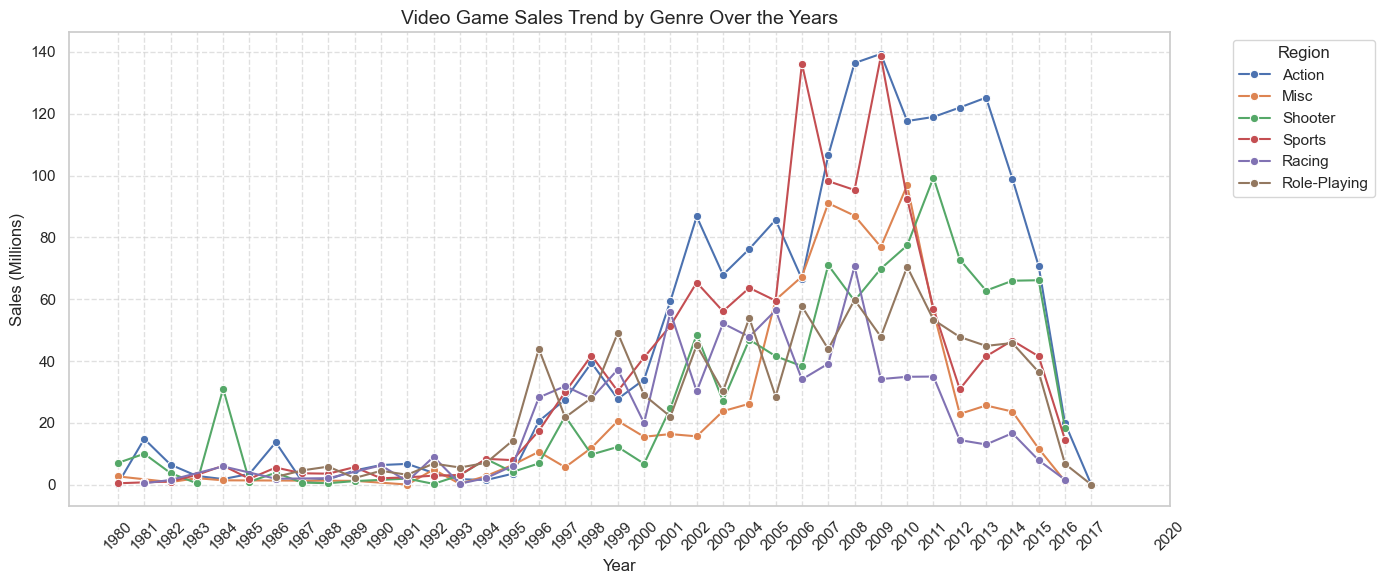

In [29]:
# Plotly line chart for Video Game Sales Trend by Genre Over the Years
df_Genre = df0.groupby(['Year','Genre'])['Global_Sales'].sum().reset_index()

df_Genre_top = df_Genre[df_Genre['Genre'].isin(['Action', 'Sports', 'Shooter', 'Misc', 'Racing', 'Role-Playing'])]

# Plot
plt.figure(figsize=(14, 6))
sns.lineplot(data=df_Genre_top, x='Year', y='Global_Sales', hue='Genre', marker='o')

# Title and axes
plt.title('Video Game Sales Trend by Genre Over the Years', fontsize=14)
plt.xlabel('Year')
plt.ylabel('Sales (Millions)')

# Add grid and ticks
years = sorted(melted['Year'].unique())
plt.xticks(ticks=years, rotation=45)
plt.grid(True, linestyle='--', alpha=0.6)
plt.legend(title="Region", bbox_to_anchor=(1.05, 1), loc='upper left')

# Save the figure (for GitHub/Kaggle display)
plt.tight_layout()
plt.savefig('genre_sales_trend.png', dpi=300)

# Show plot
plt.show()


## Global Sales Trend by Platform
This line chart shows how Platform `PC`, `DS`, `GB`, `PS2`, `X360`,`Wii`,`ps`,`ps3` sales evolved over the years.

In [31]:
df_top_plt = df0.groupby(['Year','Platform'])['Global_Sales'].sum().reset_index()

df_top = df_top_plt[df_top_plt['Platform'].isin(['PC', 'DS', 'GB', 'PS2', 'X360','Wii','ps','ps3','PS4'])]

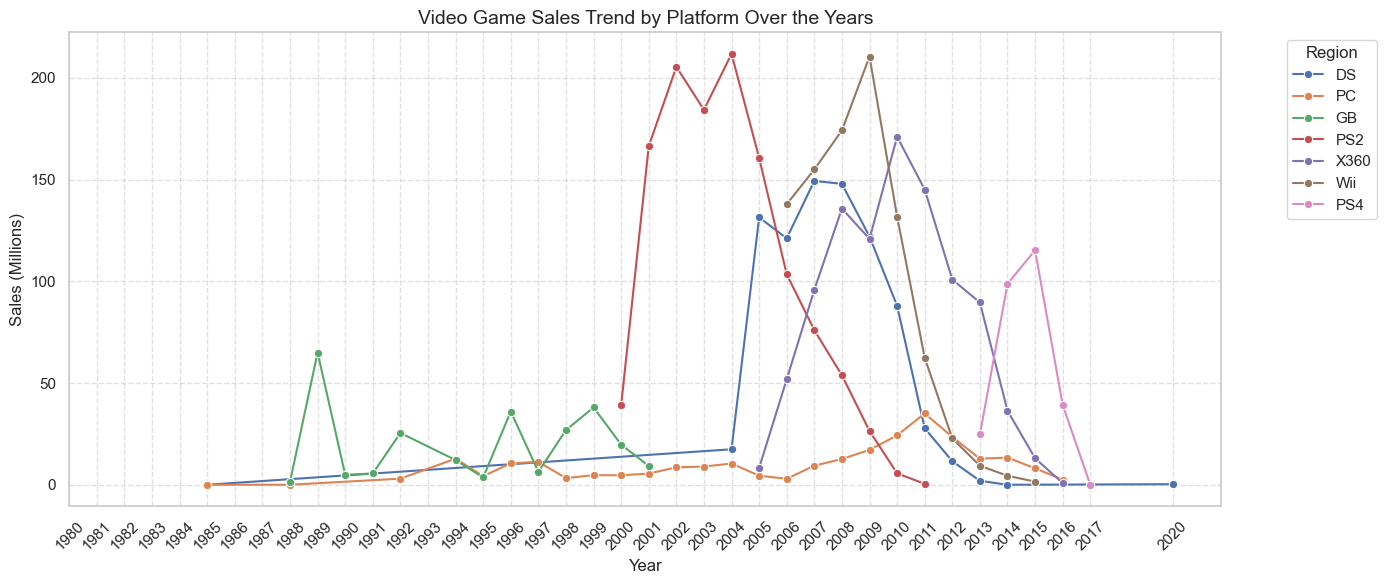

In [32]:
# Plotly line chart for Video Game Sales Trend by Platform Over the Years
# Plot
plt.figure(figsize=(14, 6))
sns.lineplot(data=df_top, x='Year', y='Global_Sales', hue='Platform', marker='o')

# Chart details
plt.title('Video Game Sales Trend by Platform Over the Years', fontsize=14)
plt.xlabel('Year')
plt.ylabel('Sales (Millions)')

# Add grid and ticks
years = sorted(melted['Year'].unique())
plt.xticks(ticks=years, rotation=45)
plt.grid(True, linestyle='--', alpha=0.6)
plt.legend(title="Region", bbox_to_anchor=(1.05, 1), loc='upper left')

# Save for use in GitHub/Kaggle
plt.tight_layout()
plt.savefig('platform_sales_trend.png', dpi=300)

# Show
plt.show()


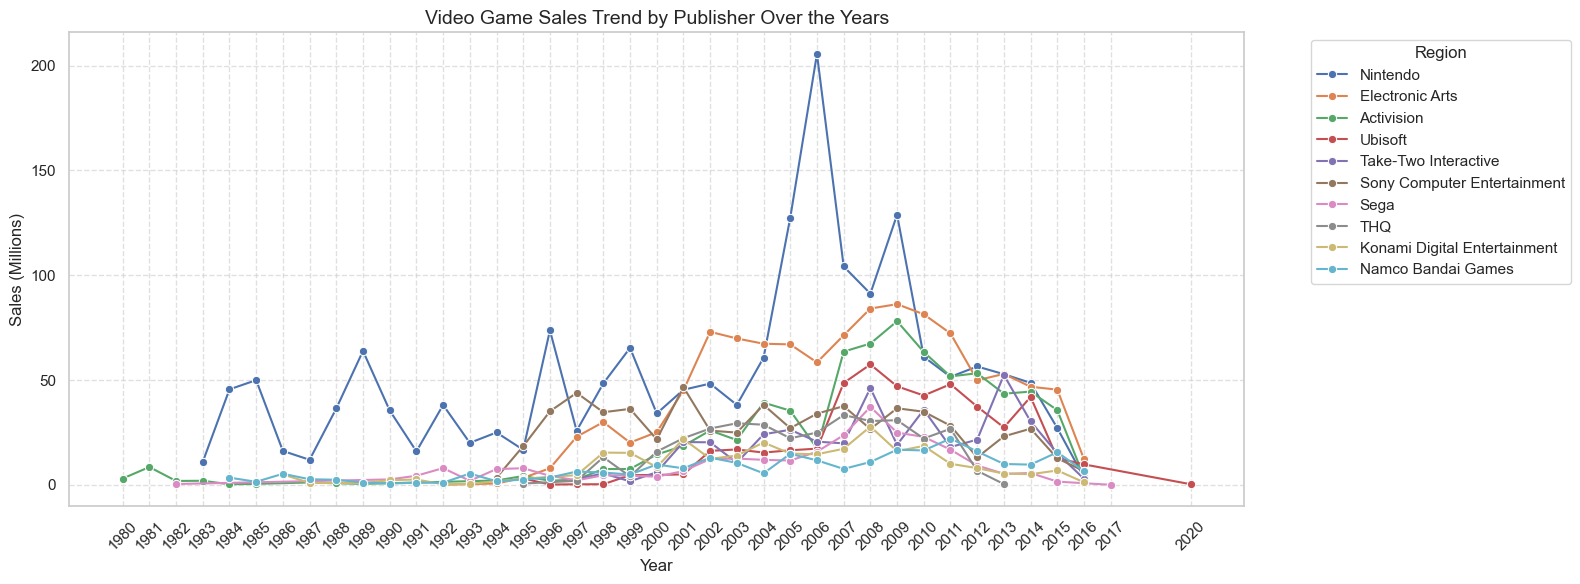

In [33]:
## picking top 10 Publisher by aggregating largest global sales.
top_dist = df0.groupby(['Year','Publisher'])['Global_Sales'].sum().reset_index()
top_10_dist = top_dist[top_dist['Publisher'].isin(['Electronic Arts', 'Activision',
                                                   'Sony Computer Entertainment', 'Ubisoft', 'Take-Two Interactive', 'THQ', 
                                                   'Konami Digital Entertainment', 'Sega', 'Namco Bandai Games','Nintendo'])].sort_values('Global_Sales',ascending=False)
# Plot
plt.figure(figsize=(16, 6))
sns.lineplot(data=top_10_dist, x='Year', y='Global_Sales', hue='Publisher', marker='o')

# Chart details
plt.title("Video Game Sales Trend by Publisher Over the Years", fontsize=14)
plt.xlabel("Year")
plt.ylabel("Sales (Millions)")

# Add grid and ticks
years = sorted(melted['Year'].unique())
plt.xticks(ticks=years, rotation=45)
plt.grid(True, linestyle='--', alpha=0.6)
plt.legend(title="Region", bbox_to_anchor=(1.05, 1), loc='upper left')

plt.tight_layout()
plt.show()

`Nintendo` has demonstrated consistent game sales from `1983 to 2016`, with a significant peak during `2004 to 2009`.
Electronic Arts (EA) follows closely behind, maintaining strong performance between `2001 and 2015`, indicating sustained market presence through multiple console generations.

## Platform Sales
This Bar chart shows different `Platform` sales. Ordered by highest to lowest sales

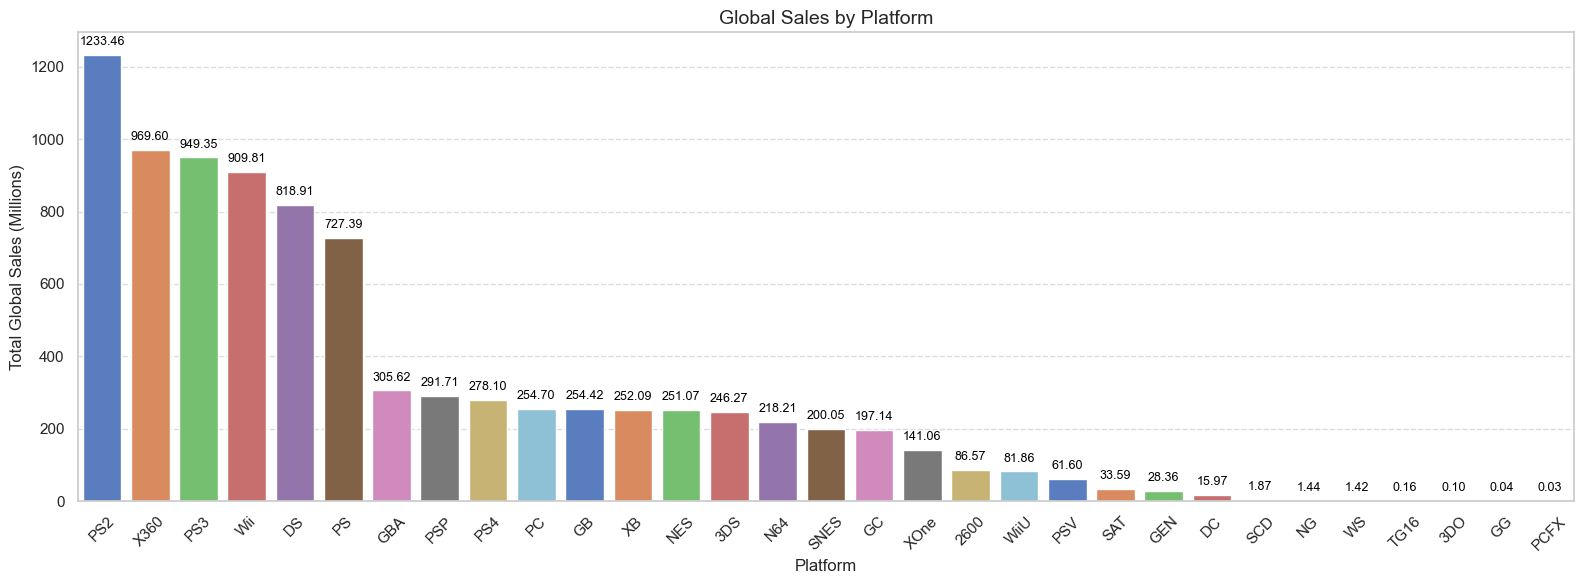

In [36]:
# Aggregate and sort the data
platform_sales = df0.groupby('Platform')['Global_Sales'].sum().sort_values(ascending=False).reset_index()

plt.figure(figsize=(16, 6))
barplot = sns.barplot(
    data=platform_sales,
    x='Platform',
    y='Global_Sales',
    palette='muted'
)

# Title and labels
plt.title("Global Sales by Platform", fontsize=14)
plt.xlabel("Platform", fontsize=12)
plt.ylabel("Total Global Sales (Millions)", fontsize=12)

# Rotate x labels
plt.xticks(rotation=45)

# Show value labels above bars
for p in barplot.patches:
    height = p.get_height()
    barplot.annotate(f'{height:.2f}',
                     (p.get_x() + p.get_width() / 2., height),
                     ha='center', va='bottom', fontsize=9, color='black', xytext=(0, 5),
                     textcoords='offset points')

# Add gridlines
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()

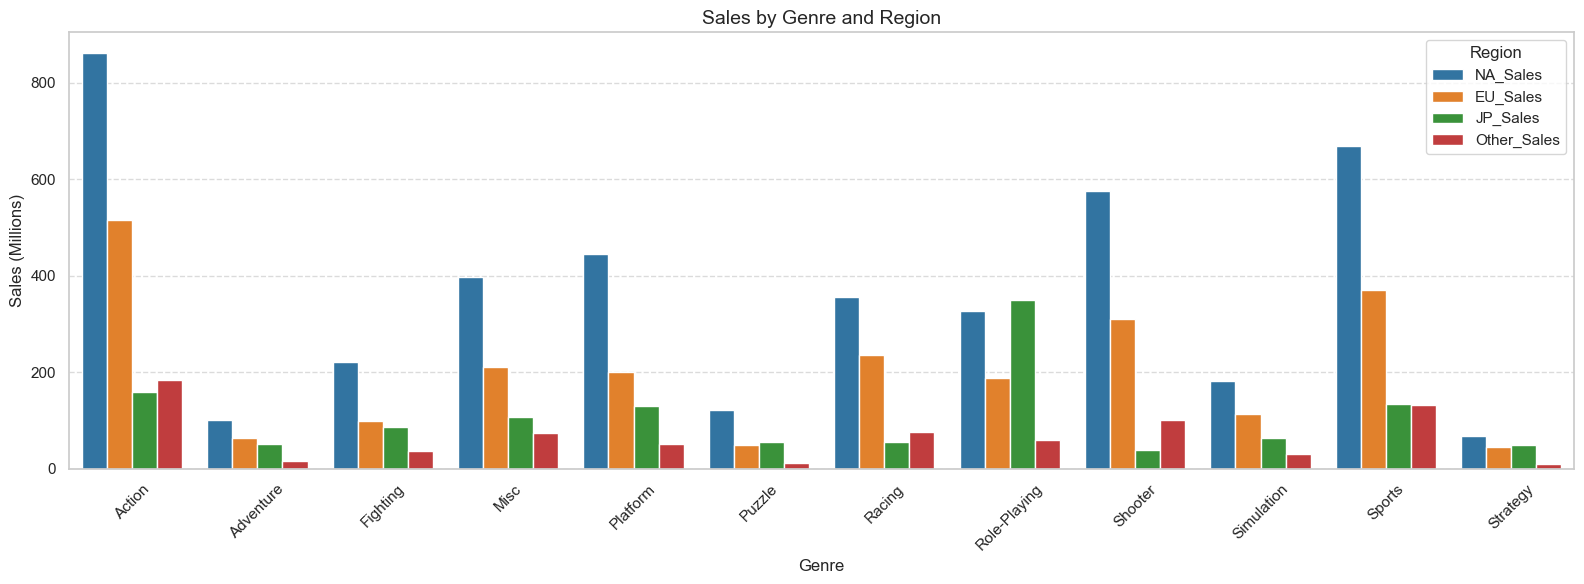

In [37]:
# Grouping data by Genre and summing up sales in each region
genre_sales = df0.groupby('Genre')[['NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales']].sum().reset_index()

# Melting the DataFrame to long format for seaborn
genre_sales_melted = genre_sales.melt(id_vars='Genre', 
                                       value_vars=['NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales'], 
                                       var_name='Region', 
                                       value_name='Sales')

plt.figure(figsize=(16, 6))

# Grouped bar chart
sns.barplot(
    data=genre_sales_melted,
    x='Genre',
    y='Sales',
    hue='Region',
    palette=['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728']  # same custom colors
)

# Labels and title
plt.title('Sales by Genre and Region', fontsize=14)
plt.xlabel('Genre', fontsize=12)
plt.ylabel('Sales (Millions)', fontsize=12)

# Rotate x-axis labels
plt.xticks(rotation=45)

# Add grid
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Legend
plt.legend(title='Region')

plt.tight_layout()
plt.savefig('sales_by_genre_region.png', dpi=300)
plt.show()

## Global Sales Trend by Genre Role playe and Shooter
This Bar chart shows how Genre `Role playe` and `Shooter` sales evolved over Region.

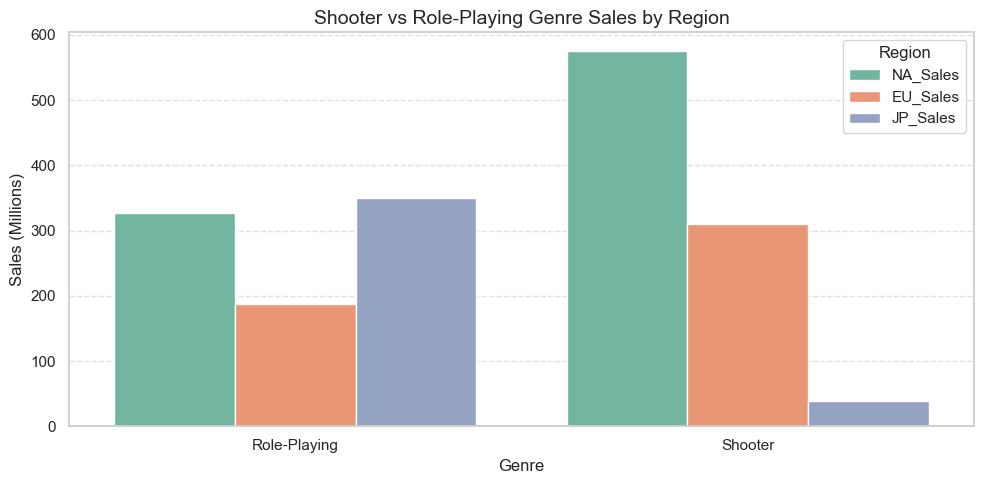

In [39]:
# Plotly Bar chart for Video Game Sales in Role play and Shooter over region
genre_region_sales = df0[df0['Genre'].isin(['Shooter', 'Role-Playing'])] \
    .groupby('Genre')[['NA_Sales', 'EU_Sales', 'JP_Sales']].sum().reset_index()

genre_melted = genre_region_sales.melt(id_vars='Genre', 
                                       value_vars=['NA_Sales', 'EU_Sales', 'JP_Sales'],
                                       var_name='Region',
                                       value_name='Sales')
# Set figure size
plt.figure(figsize=(10, 5))

# Create grouped bar chart
sns.barplot(
    data=genre_melted,
    x='Genre',
    y='Sales',
    hue='Region',
    palette='Set2'  # Matches px.colors.qualitative.Set2
)

# Customize layout
plt.title('Shooter vs Role-Playing Genre Sales by Region', fontsize=14)
plt.xlabel('Genre', fontsize=12)
plt.ylabel('Sales (Millions)', fontsize=12)
plt.legend(title='Region')
plt.tight_layout()
plt.grid(axis='y', linestyle='--', alpha=0.6)

# Save or show
plt.savefig('shooter_vs_rpg_by_region.png', dpi=300)
plt.show()

## Top Distributer in Japan

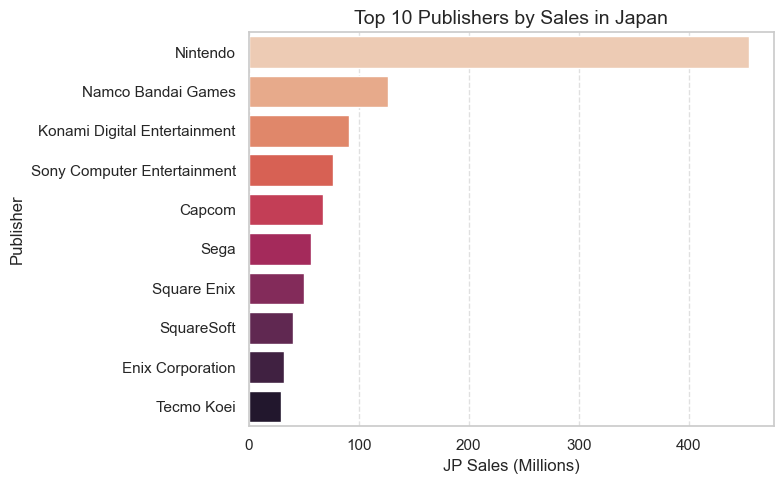

In [41]:
# Group by Publisher and sum JP_Sales
jp_top_publishers = df0.groupby('Publisher')['JP_Sales'].sum().sort_values(ascending=False).reset_index().head(10)

# Set figure size
plt.figure(figsize=(8, 5))

# Horizontal bar plot
sns.barplot(
    data=jp_top_publishers,
    x='JP_Sales',
    y='Publisher',hue='Publisher',legend=False,
    palette=sns.color_palette("rocket_r", n_colors=10)  # Similar to amp_r
)

# Customize layout
plt.title('Top 10 Publishers by Sales in Japan', fontsize=14)
plt.xlabel('JP Sales (Millions)', fontsize=12)
plt.ylabel('Publisher', fontsize=12)
plt.grid(axis='x', linestyle='--', alpha=0.6)
plt.tight_layout()

# Save or show
plt.savefig('top_10_publishers_japan.png', dpi=300)
plt.show()

## Top Distributer in North America

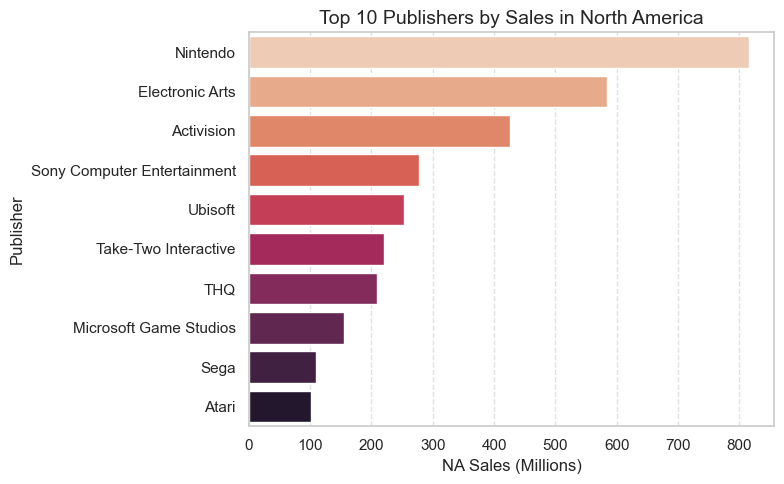

In [43]:
# Group by Publisher and sum North America
NA_top_publishers = df0.groupby('Publisher')['NA_Sales'].sum().sort_values(ascending=False).reset_index().head(10)

# Set figure size
plt.figure(figsize=(8, 5))

# Horizontal bar plot
sns.barplot(
    data=NA_top_publishers,
    x='NA_Sales',
    y='Publisher',
    palette=sns.color_palette("rocket_r", n_colors=10)
)

# Customize layout
plt.title('Top 10 Publishers by Sales in North America', fontsize=14)
plt.xlabel('NA Sales (Millions)', fontsize=12)
plt.ylabel('Publisher', fontsize=12)
plt.grid(axis='x', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show();

## Top Distributer in European Union

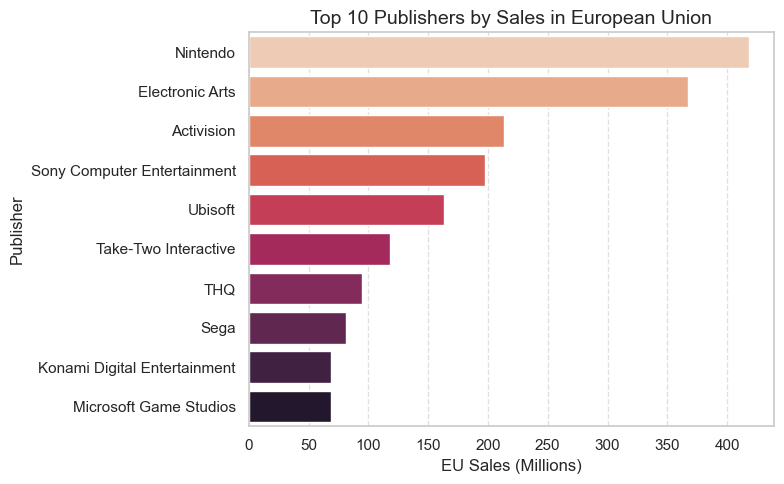

In [45]:
# Group by Publisher and sum North America
EU_top_publishers = df0.groupby('Publisher')['EU_Sales'].sum().sort_values(ascending=False).reset_index().head(10)

# Plot
plt.figure(figsize=(8, 5))

sns.barplot(
    data=EU_top_publishers,
    x='EU_Sales',
    y='Publisher',hue='Publisher',
    palette=sns.color_palette("rocket_r", n_colors=10)  # Similar to Plotly's deep_r
)

# Customize
plt.title('Top 10 Publishers by Sales in European Union', fontsize=14)
plt.xlabel('EU Sales (Millions)', fontsize=12)
plt.ylabel('Publisher', fontsize=12)
plt.grid(axis='x', linestyle='--', alpha=0.6)
plt.tight_layout()

# Save or Show
plt.savefig('top_10_publishers_eu.png', dpi=300)
plt.show()

It shows Nintendo is the top publisher in this 3 different place.

## Summery

1. **Platform Performance**
    - PlayStation 2 (PS2) consistently dominated global sales, especially between 2001 and 2005, making it the most commercially successful platform in the dataset.
    - Wii and Xbox 360 also showed strong sales peaks around 2008–2010, indicating high consumer interest in motion control and online features during that period.

2. **Genre**
    - Action, Sports, and Shooter genres were the top performers globally, particularly in North America and Europe.
    - Role-Playing Games (RPGs) performed significantly better in Japan, indicating strong regional genre preferences.

4. **Regional Revenue**
   - Contributions North America (NA) and Europe (EU) contributed the most to global sales, while Japan (JP), although smaller, had distinct taste and market behavior.
   - Games that performed well across NA and EU simultaneously generally achieved higher global success.

5. **Top Publishers**
   - A few dominant publishers like Nintendo, Electronic Arts, and Activision had significantly higher cumulative sales.
   - Publishers that diversified across platforms and genres saw broader global success.

## Recommendations 
### If you’re a mid-sized game publisher looking to expand, here’s what I’d recommend based on the data.
1. **Platform Strategy:** Focus game launches around proven high-performing platforms (e.g., PlayStation, Xbox), especially in North america and European Union

2. **Genre Localization:** Customize or market games by region-RPGs in Japan, Shooters and Sports in North America and European Union.

3. **Cross-Platform Releases:** Maximize reach by launching across multiple platforms, especially during holiday seasons.

4. **Data-Driven Planning:** Future releases should factor in temporal sales trends, regional preferences, and genre patterns to optimize performance.

## Key Takeaways
- Action and Shooter genres dominate the global sales.
- Shooters are heavily popular in North America and European Union, but underperform in Japan.
- Nintendo has demonstrated consistent game sales from 1983 to 2016, with a significant peak during 2004 to 2009.
- Electronic Arts (EA) follows closely behind, maintaining strong performance between 2001 and 2015
- Sony’s platforms peaked between 2005–2010 globally.
